Let's start by importing everything:

In [263]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import math
import matplotlib.pyplot as plt

Solving environment: done

# All requested packages already installed.



<h3>Curitiba's map:</h3>

In [264]:
ctba = folium.Map(location=[-25.4284, -49.2733], zoom_start=11)
ctba

<h3>Getting Foursquare's informations</h3>
We will get all the venues with <b>café colonial</b>, search for plant venues within a 1000m radius from then and fill all the informations about price, rating and open hours

In [268]:
#geting the cafés coloniais
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=XWHSOOPWVQPIYXEH3MTFKZGFGXY3EBFXY5SWLYB04LDVG1GF&client_secret=ZYNZXHTQG2OI514UHLKFKCEPEOOZXEZNA4C0O32HZDZDFPKH&v=20180605&near=Curitiba%2C PR%2C Brasil&query=café colonial'
cafeColonialJson = requests.get(url).json()    
cafes =[]
for grupo in cafeColonialJson['response']['groups']:
    for item in grupo['items']:
        cafe=({
        'id': item['venue']['id'],
        'name' : item['venue']['name'],
        'lat' : item['venue']['location']['lat'],
        'long' : item['venue']['location']['lng']
         })
        #checking for plant venuer near by
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=XWHSOOPWVQPIYXEH3MTFKZGFGXY3EBFXY5SWLYB04LDVG1GF&client_secret=ZYNZXHTQG2OI514UHLKFKCEPEOOZXEZNA4C0O32HZDZDFPKH&v=20180605&ll={},{}&query=plantas&radius=1000'.format(
            cafe['lat'],
            cafe['long'])
        plantsJson = requests.get(url).json()    
        cafe.update({ 'plantas' : plantsJson['response']['totalResults']})
        
        #getting the price, rating and open hours
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id=XWHSOOPWVQPIYXEH3MTFKZGFGXY3EBFXY5SWLYB04LDVG1GF&client_secret=ZYNZXHTQG2OI514UHLKFKCEPEOOZXEZNA4C0O32HZDZDFPKH&v=20180605'.format(
            cafe['id'])
        dadosJson = requests.get(url).json()        
        try:
            cafe.update({'price tier' :dadosJson['response']['venue']['price']['tier'],
                         'price msg' :dadosJson['response']['venue']['price']['message'] })
        except Exception: 
            cafe.update({'price tier' :'na',
                      'price msg' :'na'})
        try:
            cafe.update({'rating' :dadosJson['response']['venue']['rating']})
        except Exception: 
            cafe.update({'rating' :float('nan')})            
        try:
            for dia in dadosJson['response']['venue']['popular']['timeframes']:
                if  dia['days'] == 'Sun':
                    cafe.update({'sunday hours':dia['open']    
                                })          
        except Exception: 
            cafe.update({'sunday hours': 'na'})
        
        cafes.append(cafe)


In [270]:
cafeColonialDF = pd.DataFrame(cafes)
cafeColonialDF

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours
0,53235bbc498e2ee92de4c6a3,-25.406975,-49.256672,Cafe Colonial Piegel,1,Cheap,1,8.0,"[{'renderedTime': '9:00 AM–1:00 PM'}, {'render..."
1,545e9da5498ed498c4487b85,-25.534209,-49.209723,Vanille Café Colonial,0,Cheap,1,7.1,na
2,4c27aceed26eb7137b1c14d1,-25.563835,-49.124591,Casarão Café Colonial,0,Moderate,2,8.9,[{'renderedTime': '1:00 PM–9:00 PM'}]
3,4e76419e8998ed82a503bbb5,-25.388346,-49.062803,Café Colonial da Bisa,0,Cheap,1,8.4,[{'renderedTime': 'Noon–8:00 PM'}]
4,4df54fc118a88611c6c33918,-25.594394,-49.136067,Kawiarnia Café Colonial,0,Cheap,1,8.2,[{'renderedTime': '11:00 AM–9:00 PM'}]
5,4e26c37db0fb1fae1dd67928,-25.512848,-49.329280,Rosangela Confeitaria,0,Cheap,1,8.3,na
6,4bb657a9941ad13a9b461fe3,-25.430678,-49.253170,Coeur Douce,3,Expensive,3,8.7,[{'renderedTime': 'Noon–9:00 PM'}]
7,536d6044498ef5316d7122a8,-25.450001,-49.298610,Empório Kaminski,0,Expensive,3,8.1,"[{'renderedTime': '8:00 AM–Noon'}, {'renderedT..."
8,4d750e83d0c73704742bf917,-25.307560,-49.144103,É da Pam - Restaurante Rural & Café Colonial,0,na,na,7.9,[{'renderedTime': '11:00 AM–7:00 PM'}]
9,4fd3adf2e4b07b066260d462,-25.427700,-49.274400,cafe colonial,2,na,na,NaN,na


Let's start to build a dataframe that will be base to the clustering.

first, replace the nas in the 'price tier' row with 2 (a moderate price) and the na in ratings with the mean of the row

In [ ]:
cafeColonialDF['price tier'][cafeColonialDF['price tier'] == 'na'] = 2
cafeColonialDF['rating'][cafeColonialDF['rating'].isnull()]  = cafeColonialDF['rating'].mean()

and create the late sunday row with 1 (if is open at late sunday hours) or 0 (not), having the ones with na = 0

In [279]:
late =[]
for data in cafeColonialDF['sunday hours']:
    if data == 'na' or type (data) == float:
        late.append(0)
    else:
        if data[0]['renderedTime'] != 'None':
            late.append(1)
        else:
            late.append(0)   
        
cafeColonialDF['late sunday']= late;

An now we have:

In [287]:
cafeColonialDF

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday
0,53235bbc498e2ee92de4c6a3,-25.406975,-49.256672,Cafe Colonial Piegel,1,Cheap,1,8.000000,"[{'renderedTime': '9:00 AM–1:00 PM'}, {'render...",1
1,545e9da5498ed498c4487b85,-25.534209,-49.209723,Vanille Café Colonial,0,Cheap,1,7.100000,na,0
2,4c27aceed26eb7137b1c14d1,-25.563835,-49.124591,Casarão Café Colonial,0,Moderate,2,8.900000,[{'renderedTime': '1:00 PM–9:00 PM'}],1
3,4e76419e8998ed82a503bbb5,-25.388346,-49.062803,Café Colonial da Bisa,0,Cheap,1,8.400000,[{'renderedTime': 'Noon–8:00 PM'}],1
4,4df54fc118a88611c6c33918,-25.594394,-49.136067,Kawiarnia Café Colonial,0,Cheap,1,8.200000,[{'renderedTime': '11:00 AM–9:00 PM'}],1
5,4e26c37db0fb1fae1dd67928,-25.512848,-49.329280,Rosangela Confeitaria,0,Cheap,1,8.300000,na,0
6,4bb657a9941ad13a9b461fe3,-25.430678,-49.253170,Coeur Douce,3,Expensive,3,8.700000,[{'renderedTime': 'Noon–9:00 PM'}],1
7,536d6044498ef5316d7122a8,-25.450001,-49.298610,Empório Kaminski,0,Expensive,3,8.100000,"[{'renderedTime': '8:00 AM–Noon'}, {'renderedT...",1
8,4d750e83d0c73704742bf917,-25.307560,-49.144103,É da Pam - Restaurante Rural & Café Colonial,0,na,2,7.900000,[{'renderedTime': '11:00 AM–7:00 PM'}],1
9,4fd3adf2e4b07b066260d462,-25.427700,-49.274400,cafe colonial,2,na,2,7.427778,na,0


So let's do some clusters!

In [335]:
temp = cafeColonialDF[['plantas', 'price tier', 'rating',  'late sunday']]
#normalization:
#from sklearn import preprocessing
#fit=preprocessing.MinMaxScaler()
#temp = fit.fit_transform(temp)
Kcluster = KMeans(n_clusters=5, random_state=0).fit(temp)

In [365]:
cafeColonialDF['clusters']=Kcluster.labels_
cafeColonialDF

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
0,53235bbc498e2ee92de4c6a3,-25.406975,-49.256672,Cafe Colonial Piegel,1,Cheap,1.0,8.000000,"[{'renderedTime': '9:00 AM–1:00 PM'}, {'render...",1,3,Best Ratings
1,545e9da5498ed498c4487b85,-25.534209,-49.209723,Vanille Café Colonial,0,Cheap,1.0,7.100000,na,0,4,Best cost/benefit
2,4c27aceed26eb7137b1c14d1,-25.563835,-49.124591,Casarão Café Colonial,0,Moderate,2.0,8.900000,[{'renderedTime': '1:00 PM–9:00 PM'}],1,3,Best Ratings
3,4e76419e8998ed82a503bbb5,-25.388346,-49.062803,Café Colonial da Bisa,0,Cheap,1.0,8.400000,[{'renderedTime': 'Noon–8:00 PM'}],1,3,Best Ratings
4,4df54fc118a88611c6c33918,-25.594394,-49.136067,Kawiarnia Café Colonial,0,Cheap,1.0,8.200000,[{'renderedTime': '11:00 AM–9:00 PM'}],1,3,Best Ratings
5,4e26c37db0fb1fae1dd67928,-25.512848,-49.329280,Rosangela Confeitaria,0,Cheap,1.0,8.300000,na,0,4,Best cost/benefit
6,4bb657a9941ad13a9b461fe3,-25.430678,-49.253170,Coeur Douce,3,Expensive,3.0,8.700000,[{'renderedTime': 'Noon–9:00 PM'}],1,2,Fanciest
7,536d6044498ef5316d7122a8,-25.450001,-49.298610,Empório Kaminski,0,Expensive,3.0,8.100000,"[{'renderedTime': '8:00 AM–Noon'}, {'renderedT...",1,2,Best Ratings
8,4d750e83d0c73704742bf917,-25.307560,-49.144103,É da Pam - Restaurante Rural & Café Colonial,0,na,2.0,7.900000,[{'renderedTime': '11:00 AM–7:00 PM'}],1,3,Best Ratings
9,4fd3adf2e4b07b066260d462,-25.427700,-49.274400,cafe colonial,2,na,2.0,7.427778,na,0,0,Well rounded


analising the clusters:

In [366]:
cafeColonialDF['price tier']=cafeColonialDF['price tier'].astype(np.float)
cafeColonialDF[cafeColonialDF['clusters']==0]

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
9,4fd3adf2e4b07b066260d462,-25.427700,-49.274400,cafe colonial,2,na,2.0,7.427778,na,0,0,Well rounded
12,4d233b6e5acaa35dbbbade35,-25.430966,-49.272496,Degrau Restaurante,1,Moderate,2.0,7.400000,NaN,0,0,Well rounded
15,4d2d078979bc721e14eae7ee,-25.435104,-49.261549,Hotel Vilaggio Requinte,2,na,2.0,6.900000,na,0,0,Well rounded


In [367]:
cafeColonialDF[cafeColonialDF['clusters']==0].describe()

,lat,long,plantas,price tier,rating,late sunday,clusters
count,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0
mean,-25.431256,-49.269482,1.666667,2.0,7.242593,0.0,0.0
std,0.003710,0.006935,0.577350,0.0,0.297019,0.0,0.0
min,-25.435104,-49.274400,1.000000,2.0,6.900000,0.0,0.0
25%,-25.433035,-49.273448,1.500000,2.0,7.150000,0.0,0.0
50%,-25.430966,-49.272496,2.000000,2.0,7.400000,0.0,0.0
75%,-25.429333,-49.267023,2.000000,2.0,7.413889,0.0,0.0
max,-25.427700,-49.261549,2.000000,2.0,7.427778,0.0,0.0


In [368]:
cafeColonialDF[cafeColonialDF['clusters']==1]

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
10,4daa089a6a2303012f04b8eb,-25.571054,-49.146163,Casa Bela Café Colonial,0,Cheap,1.0,6.5,[{'renderedTime': '9:00 AM–8:00 PM'}],1,1,Cheapest
11,51c753be498edd330a29842a,-25.569017,-49.136965,Vanille Café Colonial,0,Cheap,1.0,6.0,[{'renderedTime': '11:00 AM–8:00 PM'}],1,1,Cheapest
17,4c64c7ed7451b713e701120c,-25.417045,-49.256341,Confeitaria Valbella,2,Cheap,1.0,5.7,[{'renderedTime': '9:00 AM–7:00 PM'}],1,1,Cheapest
21,4cb99b920180721e4b029561,-25.441665,-49.272506,Sucos Wing,0,Cheap,1.0,5.8,"[{'renderedTime': '10:00 AM–11:00 AM'}, {'rend...",1,1,Cheapest
22,4cc1a46043646dcbeee4468c,-25.433347,-49.301092,Cacau Show,0,na,2.0,5.3,[{'renderedTime': 'None'}],0,1,Cheapest


In [369]:
cafeColonialDF[cafeColonialDF['clusters']==1].describe()

,lat,long,plantas,price tier,rating,late sunday,clusters
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,-25.486426,-49.222613,0.400000,1.200000,5.860000,0.800000,1.0
std,0.076840,0.075773,0.894427,0.447214,0.439318,0.447214,0.0
min,-25.571054,-49.301092,0.000000,1.000000,5.300000,0.000000,1.0
25%,-25.569017,-49.272506,0.000000,1.000000,5.700000,1.000000,1.0
50%,-25.441665,-49.256341,0.000000,1.000000,5.800000,1.000000,1.0
75%,-25.433347,-49.146163,0.000000,1.000000,6.000000,1.000000,1.0
max,-25.417045,-49.136965,2.000000,2.000000,6.500000,1.000000,1.0


In [370]:
cafeColonialDF[cafeColonialDF['clusters']==2]

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
6,4bb657a9941ad13a9b461fe3,-25.430678,-49.253170,Coeur Douce,3,Expensive,3.0,8.7,[{'renderedTime': 'Noon–9:00 PM'}],1,2,Fanciest
7,536d6044498ef5316d7122a8,-25.450001,-49.298610,Empório Kaminski,0,Expensive,3.0,8.1,"[{'renderedTime': '8:00 AM–Noon'}, {'renderedT...",1,2,Best Ratings
19,4b8abddbf964a520c07d32e3,-25.432826,-49.290227,Saint Germain,2,Expensive,3.0,7.7,"[{'renderedTime': '8:00 AM–1:00 PM'}, {'render...",1,2,Fanciest


In [371]:
cafeColonialDF[cafeColonialDF['clusters']==2].describe()

,lat,long,plantas,price tier,rating,late sunday,clusters
count,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0
mean,-25.437835,-49.280669,1.666667,3.0,8.166667,1.0,2.0
std,0.010591,0.024181,1.527525,0.0,0.503322,0.0,0.0
min,-25.450001,-49.298610,0.000000,3.0,7.700000,1.0,2.0
25%,-25.441414,-49.294419,1.000000,3.0,7.900000,1.0,2.0
50%,-25.432826,-49.290227,2.000000,3.0,8.100000,1.0,2.0
75%,-25.431752,-49.271698,2.500000,3.0,8.400000,1.0,2.0
max,-25.430678,-49.253170,3.000000,3.0,8.700000,1.0,2.0


In [372]:
cafeColonialDF[cafeColonialDF['clusters']==3]

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
0,53235bbc498e2ee92de4c6a3,-25.406975,-49.256672,Cafe Colonial Piegel,1,Cheap,1.0,8.0,"[{'renderedTime': '9:00 AM–1:00 PM'}, {'render...",1,3,Best Ratings
2,4c27aceed26eb7137b1c14d1,-25.563835,-49.124591,Casarão Café Colonial,0,Moderate,2.0,8.9,[{'renderedTime': '1:00 PM–9:00 PM'}],1,3,Best Ratings
3,4e76419e8998ed82a503bbb5,-25.388346,-49.062803,Café Colonial da Bisa,0,Cheap,1.0,8.4,[{'renderedTime': 'Noon–8:00 PM'}],1,3,Best Ratings
4,4df54fc118a88611c6c33918,-25.594394,-49.136067,Kawiarnia Café Colonial,0,Cheap,1.0,8.2,[{'renderedTime': '11:00 AM–9:00 PM'}],1,3,Best Ratings
8,4d750e83d0c73704742bf917,-25.307560,-49.144103,É da Pam - Restaurante Rural & Café Colonial,0,na,2.0,7.9,[{'renderedTime': '11:00 AM–7:00 PM'}],1,3,Best Ratings
16,4bb9b84eb35776b08616ca01,-25.500437,-49.236523,Panificadora Cheirinho de Pão,0,Moderate,2.0,8.8,"[{'renderedTime': '9:00 AM–Noon'}, {'renderedT...",1,3,Best Ratings


In [373]:
cafeColonialDF[cafeColonialDF['clusters']==3].describe()

,lat,long,plantas,price tier,rating,late sunday,clusters
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0
mean,-25.460258,-49.160126,0.166667,1.500000,8.366667,1.0,3.0
std,0.111052,0.073113,0.408248,0.547723,0.413118,0.0,0.0
min,-25.594394,-49.256672,0.000000,1.000000,7.900000,1.0,3.0
25%,-25.547986,-49.213418,0.000000,1.000000,8.050000,1.0,3.0
50%,-25.453706,-49.140085,0.000000,1.500000,8.300000,1.0,3.0
75%,-25.393003,-49.127460,0.000000,2.000000,8.700000,1.0,3.0
max,-25.307560,-49.062803,1.000000,2.000000,8.900000,1.0,3.0


In [374]:
cafeColonialDF[cafeColonialDF['clusters']==4]

,id,lat,long,name,plantas,price msg,price tier,rating,sunday hours,late sunday,clusters,group
1,545e9da5498ed498c4487b85,-25.534209,-49.209723,Vanille Café Colonial,0,Cheap,1.0,7.100000,na,0,4,Best cost/benefit
5,4e26c37db0fb1fae1dd67928,-25.512848,-49.329280,Rosangela Confeitaria,0,Cheap,1.0,8.300000,na,0,4,Best cost/benefit
13,53caca6b498e85df6b191d39,-25.581658,-49.485166,Café Colonial,0,Cheap,1.0,7.427778,na,0,4,Best cost/benefit
14,53164c58498e58a04ec6e652,-25.539448,-49.173121,Casarão Café Colonial,0,Moderate,2.0,7.427778,na,0,4,Best cost/benefit
18,4d3342f7c75a6ea8e08515ae,-25.568996,-49.136944,Kaffee Stube Café Colonial,0,Cheap,1.0,7.427778,na,0,4,Best cost/benefit
20,520908de498e22afedef5b06,-25.460677,-49.527251,Tradição Restaurante e Café Colonial,0,Moderate,2.0,7.427778,na,0,4,Best cost/benefit


In [375]:
cafeColonialDF[cafeColonialDF['clusters']==4].describe()

,lat,long,plantas,price tier,rating,late sunday,clusters
count,6.000000,6.000000,6.0,6.000000,6.000000,6.0,6.0
mean,-25.532973,-49.310247,0.0,1.333333,7.518519,0.0,4.0
std,0.043228,0.165525,0.0,0.516398,0.404674,0.0,0.0
min,-25.581658,-49.527251,0.0,1.000000,7.100000,0.0,4.0
25%,-25.561609,-49.446195,0.0,1.000000,7.427778,0.0,4.0
50%,-25.536829,-49.269501,0.0,1.000000,7.427778,0.0,4.0
75%,-25.518188,-49.182271,0.0,1.750000,7.427778,0.0,4.0
max,-25.460677,-49.136944,0.0,2.000000,8.300000,0.0,4.0


In order to be easier to visualize all the info above and the differences between the clustes, let's do some tables and plots: 


In [376]:
graficoCafe = cafeColonialDF.groupby('clusters').aggregate(np.mean).reset_index()[['plantas','price tier','rating','late sunday']]
graficoCafe

,plantas,price tier,rating,late sunday
0,1.666667,2.000000,7.242593,0.0
1,0.400000,1.200000,5.860000,0.8
2,1.666667,3.000000,8.166667,1.0
3,0.166667,1.500000,8.366667,1.0
4,0.000000,1.333333,7.518519,0.0


In [377]:
x = np.arange(5)
ys = [i+x+(i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
grupsCC = {0:"Cluster 0",1:"Cluster 1",2:"Cluster 2",3:'Cluster 3',4:'Cluster 4'}

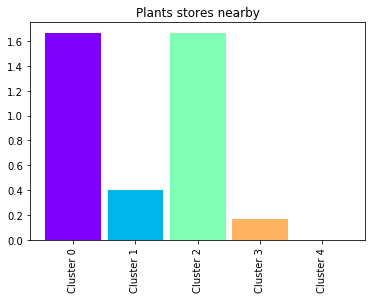

In [378]:
plt.bar([1,2,3,4,5],graficoCafe['plantas'], width = 0.9, color = rainbow, label='Plants')
plt.xticks([1,2,3,4,5], grupsCC.values(), rotation=90)
plt.title('Plants stores nearby')
plt.show()

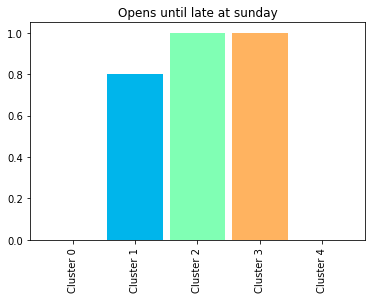

In [379]:
plt.bar([1,2,3,4,5],graficoCafe['late sunday'], width = 0.9, color = rainbow, label='Plants')
plt.xticks([1,2,3,4,5], grupsCC.values(), rotation=90)
plt.title('Opens until late at sunday')
plt.show()


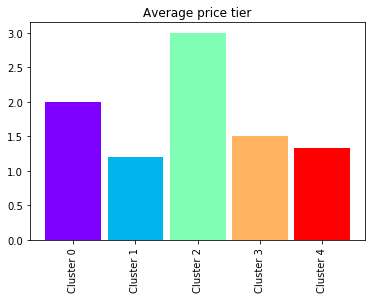

In [380]:
plt.bar([1,2,3,4,5],graficoCafe['price tier'], width = 0.9, color = rainbow, label='Plants')
plt.xticks([1,2,3,4,5], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], rotation=90)
plt.title('Average price tier')
plt.show()

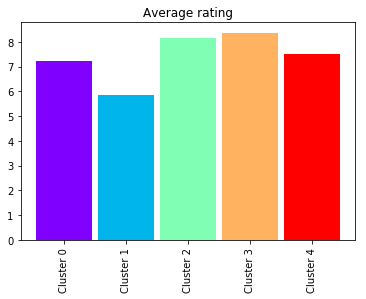

In [381]:
plt.bar([1,2,3,4,5],graficoCafe['rating'], width = 0.9, color = rainbow, label='Plants')
plt.xticks([1,2,3,4,5], grupsCC.values(), rotation=90)
plt.title('Average rating')
plt.show()

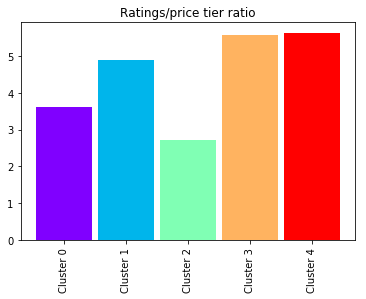

In [382]:
plt.bar([1,2,3,4,5], (graficoCafe['rating']/graficoCafe['price tier']), width = 0.9, color = rainbow, label='Plants')
plt.xticks([1,2,3,4,5], grupsCC.values(), rotation=90)
plt.title('Ratings/price tier ratio')
plt.show()

With those informations, we can rename the cluster into something more meaningfull (the reasons why are on the report):

In [ ]:
grupsCC = {0:"Well rounded ",1:"Cheapest ",2:"Fanciest ",3:"Best Ratings ",4:"Best cost/benefit "}
cafeColonialDF['group'] = cafeColonialDF['clusters']

for key in grupsCC:
    cafeColonialDF['group'][cafeColonialDF['group'] == key] = grupsCC[key]

In [384]:
cafeColonialDF[['name', 'group']].sort_values(by=['group'])

,name,group
0,Cafe Colonial Piegel,Best Ratings
2,Casarão Café Colonial,Best Ratings
3,Café Colonial da Bisa,Best Ratings
4,Kawiarnia Café Colonial,Best Ratings
8,É da Pam - Restaurante Rural & Café Colonial,Best Ratings
16,Panificadora Cheirinho de Pão,Best Ratings
1,Vanille Café Colonial,Best cost/benefit
5,Rosangela Confeitaria,Best cost/benefit
20,Tradição Restaurante e Café Colonial,Best cost/benefit
18,Kaffee Stube Café Colonial,Best cost/benefit


and, of course, a map with all the groups, just to be able to visualize where we need to go in order to eat : )

In [385]:
ctbaCafes = folium.Map(location=[-25.4284, -49.2733], zoom_start=11)

grupos = ""
for grup in grupsCC:
    grupos += "&nbsp; <i class=\"fa fa-map-marker fa-2x\" style=\"color:{}\"></i>&nbsp;{} <br>".format(rainbow[grup-1], grupsCC[grup]) 

for lat, lon, poi, cluster in zip(cafeColonialDF['lat'], cafeColonialDF['long'], cafeColonialDF['name'], cafeColonialDF['clusters']):   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ctbaCafes)
    
  
    
legend_html = "<div style=\"position: fixed; bottom: 50px; left: 25px; border:2px solid grey; z-index:9999; font-size:10px;\"> \
<div>&nbsp;<b>Grups: </b><br>{} &nbsp;<br></div> </div>".format(grupos)

ctbaCafes.get_root().html.add_child(folium.Element(legend_html))

ctbaCafes

And a graph to identify the venues:

In [386]:
tam = cafeColonialDF.shape[0]

x2 = np.arange(tam)
ys2 = [i+x+(i*x)**2 for i in range(tam)]
colors_array2 = cm.rainbow(np.linspace(0, 1, len(ys2)))
rainbow2 = [colors.rgb2hex(i) for i in colors_array2]
markers_colors2 = []

ctbaCafes2 = folium.Map(location=[-25.4284, -49.2733], zoom_start=11)

cafes = ""
i= 0
for lat, lon, poi, cluster in zip(cafeColonialDF['lat'], cafeColonialDF['long'], cafeColonialDF['name'], cafeColonialDF['group']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=rainbow2[i],
        fill=True,
        fill_color=rainbow2[i],
        fill_opacity=0.7).add_to(ctbaCafes2)    
    
    cafes += "&nbsp; <i class=\"fa fa-map-marker fa-2x\" style=\"color:{}\"></i>&nbsp;{} [{}] <br>".format(rainbow2[i], poi,  cluster ) 
    i = i + 1 
    
    
legend_html = "<div style=\"position: fixed; bottom: 50px; left: 25px; border:2px solid grey; z-index:9999; font-size:10px;\"> \
<div>&nbsp;<b>Grups: </b><br>{} &nbsp;<br></div> </div>".format(cafes)

ctbaCafes2.get_root().html.add_child(folium.Element(legend_html))

ctbaCafes2

This is the end of this part.
All the analysis of this data will be on the report part

